## Basics: Reference Atlas Brain Areas Tutorial
<a target="_blank" href="https://colab.research.google.com/github/VirtualBrainLab/urchin-examples/blob/main/basics/areas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Install Urchin

Urchin is a Python package stored on PyPI, the following code needs to be run the first time you use Urchin in a Python environment. 

Urchin's full documentation can be found [on our website](https://virtualbrainlab.org/urchin/installation_and_use.html).

In [1]:
#Installing urchin
!pip install oursin -U

## Setup Urchin and open the renderer webpage 

By default Urchin opens the 3D renderer in a webpage. Make sure pop-ups are enabled, or the page won't open properly. You can also open the renderer site yourself by replace [ID here] with the ID that is output by the call to `.setup()`  https://data.virtualbrainlab.org/Urchin/?ID=[ID here]

Note that Urchin communicates to the renderer webpage through an internet connection, we don't currently support offline use (we hope to add support in the future).

In [1]:
import oursin as urchin
urchin.setup(localhost=True)

(URN) connected to server
Login sent with ID: b2e51675, copy this ID into the renderer to connect.


## Loading a reference atlas and displaying brain areas

Multiple reference atlases are available in Urchin, before we can access individual brain areas we need to have an atlas loaded. Here we'll load the Allen Mouse CCF atlas.

Only one atlas can be loaded at a time.

In [2]:
urchin.ccf25.load()

An Atlas stores a list of areas, which can be loaded in the renderer

In [2]:
print(urchin.ccf25.areas)
urchin.ccf25.root.set_visibility(True)

['root', 'grey', 'CH', 'CTX', 'CTXpl', 'Isocortex', 'FRP', 'FRP1', 'FRP2/3', 'FRP5', 'FRP6a', 'FRP6b', 'MO', 'MOp', 'MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b', 'SS', 'SSp', 'SSp-n', 'SSp-n1', 'SSp-n2/3', 'SSp-n4', 'SSp-n5', 'SSp-n6a', 'SSp-n6b', 'SSp-bfd', 'SSp-bfd1', 'SSp-bfd2/3', 'SSp-bfd4', 'SSp-bfd5', 'SSp-bfd6a', 'SSp-bfd6b', 'SSp-ll', 'SSp-ll1', 'SSp-ll2/3', 'SSp-ll4', 'SSp-ll5', 'SSp-ll6a', 'SSp-ll6b', 'SSp-m', 'SSp-m1', 'SSp-m2/3', 'SSp-m4', 'SSp-m5', 'SSp-m6a', 'SSp-m6b', 'SSp-ul', 'SSp-ul1', 'SSp-ul2/3', 'SSp-ul4', 'SSp-ul5', 'SSp-ul6a', 'SSp-ul6b', 'SSp-tr', 'SSp-tr1', 'SSp-tr2/3', 'SSp-tr4', 'SSp-tr5', 'SSp-tr6a', 'SSp-tr6b', 'SSp-un', 'SSp-un1', 'SSp-un2/3', 'SSp-un4', 'SSp-un5', 'SSp-un6a', 'SSp-un6b', 'SSs', 'SSs1', 'SSs2/3', 'SSs4', 'SSs5', 'SSs6a', 'SSs6b', 'GU', 'GU1', 'GU2/3', 'GU4', 'GU5', 'GU6a', 'GU6b', 'VISC', 'VISC1', 'VISC2/3', 'VISC4', 'VISC5', 'VISC6a', 'VISC6b', 'AUD', 'AUDd', 'AUDd1', 'AUDd2/3', 'AUDd4', 'A

Throughout this tutorial, we'll use the screenshot function on the main camera to see what effect we had on the scene. Note that because taking screenshots requires waiting for data to come back, you need to use the Python `await` keyword.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


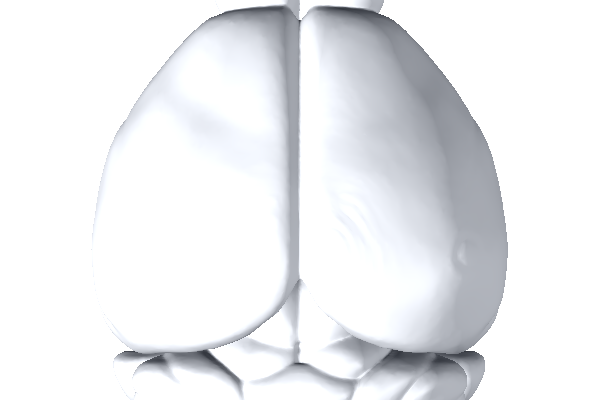

In [5]:
await urchin.camera.main.screenshot(size=[600,400])

Areas have a bit of metadata as well

In [ ]:
print(urchin.ccf25.root.name)
print(urchin.ccf25.root.acronym)
print(urchin.ccf25.root.id)
print(urchin.ccf25.root.color)

root
root
997
#FFFFFF


You might not want to load areas with their default color or material, you can set your own color, material, and alpha overrides.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


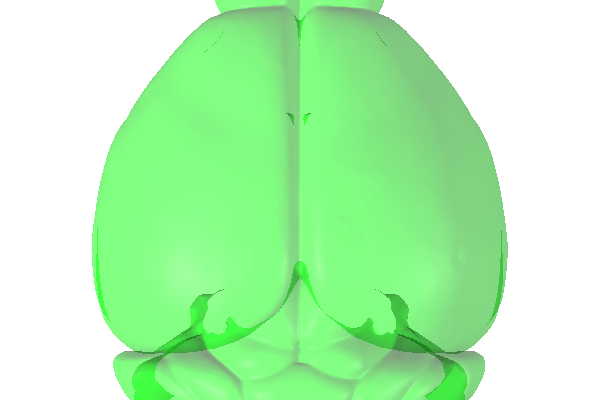

In [6]:
# load a single area
urchin.ccf25.root.set_color('#00ff00')
urchin.ccf25.root.set_material('transparent-lit')
urchin.ccf25.root.set_alpha(0.5)
await urchin.camera.main.screenshot(size=[600,400])

You can also clear the atlas off of the screen. It will remain loaded in the background.

In [7]:
urchin.ccf25.clear()

You can use the `sided` input parameter for any of the area functions to load a single hemisphere.

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


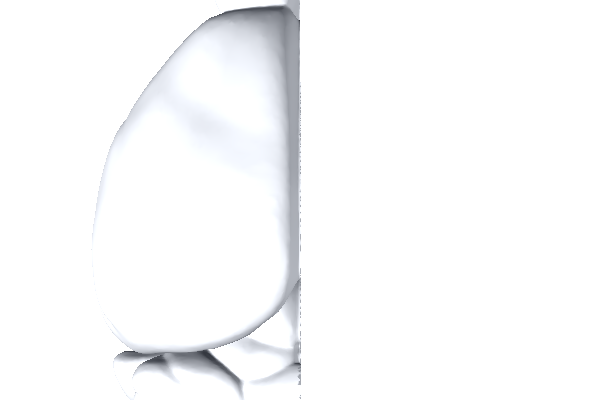

In [9]:
# load just left hemisphere
urchin.ccf25.root.set_visibility(True, sided='left')
await urchin.camera.main.screenshot(size=[600,400])

In [10]:
urchin.ccf25.clear()

# Complete example with the IBL BWM dataset

We're going to work through a complete example here similar to what you might do in your own analysis. We'll grab a set of data files related to the IBL Brain-wide map and use those to set the color of brain regions in the renderer. Then we'll rotate the camera to get a nice angle and take a screenshot.

In [45]:
# import additional packages
import pyarrow.parquet as pq
import pandas as pd
import requests
import numpy as np

from io import BytesIO

In [46]:
## Get data from google drive
# The BWM analysis output are stored in set of parquet files, let's load them from their google drive links

# The datasets are the decoding analysis results for block, choice, feedback, stimulus, wheel speed, and wheel velocity
drive_ids = ['16m-vWRxtbsnaq4oX15lK7BIKnsqsZ-UT', 
'1F-UYxLCX0FT_0Vh5ugGByVM6RL0u7cCp', 
'1Fq_07Rexvq_Vp7Mh0_TOR1xRmLhHSwDh', 
'1MU5Oe-BaU8YQTlS-0egwPhgoiOLYO5Zm', 
'15Vas51DHezrwrUje1ZJrMI2uAeJcxl8j', 
'1nquiEYdFuORtrHF3LyJT32Dr_d2Kt_k4']

datasets = []
for file_id in drive_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    response = requests.get(url)
    
    parquet_file = pq.read_table(BytesIO(response.content))
    datasets.append(parquet_file.to_pandas())

# There's one area that shows up in IBL that we don't have in our atlas, so we'll just drop that area...
missing_area = 'CUL4 5'
for i, dataset in enumerate(datasets):
    datasets[i] = dataset[dataset.acronym_b != missing_area]

In [52]:
urchin.ccf25.load()

(Warning) Atlas was already loaded, the renderer can have issues if you try to load an atlas twice.


In [53]:
# Let's start by loading all the brain areas, just the left side
area_names = datasets[0].acronym_b.values
area_list = urchin.ccf25.get_areas(area_names)

urchin.ccf25.set_visibilities(area_list, True, urchin.utils.Side.LEFT)

{"acronym": ["FRP", "MOp", "MOs", "SSp-n", "SSp-bfd", "SSp-ll", "SSp-m", "SSp-ul", "SSp-tr", "SSs", "VISC", "AUDp", "AUDv", "VISam", "VISl", "VISp", "VISpm", "VISli", "VISpor", "ACAd", "ACAv", "PL", "ILA", "ORBl", "ORBm", "ORBvl", "AId", "AIp", "AIv", "RSPagl", "RSPd", "RSPv", "VISa", "VISrl", "TEa", "ECT", "AON", "TTd", "DP", "PIR", "COAp", "CA1", "CA3", "DG", "ENTl", "ENTm", "PAR", "POST", "PRE", "SUB", "ProS", "EPd", "EPv", "BLA", "BMA", "PA", "CP", "ACB", "OT", "LSr", "LSv", "SF", "CEA", "MEA", "GPe", "SI", "MS", "TRS", "BST", "VAL", "VM", "VPL", "VPM", "PoT", "MG", "LGd", "LP", "PO", "POL", "SGN", "Eth", "AV", "AM", "LD", "MD", "SMT", "PVT", "PCN", "RT", "LGv", "MPO", "LHA", "PeF", "ZI", "IC", "MRN", "SCm", "PAG", "APN", "RN", "PPN", "PB", "PRNc", "V", "CS", "PRNr", "DCO", "SPVI", "GRN", "IRN", "MDRN", "PARN", "MV", "CENT2", "CENT3", "NOD", "SIM", "ANcr1", "ANcr2", "PRM", "COPY", "IP"], "side": [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

In [54]:
# rotate the camera so we are looking from the "anterior/left/dorsal" coordinate
urchin.camera.main.set_rotation([22.5, 22.5, 225])

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


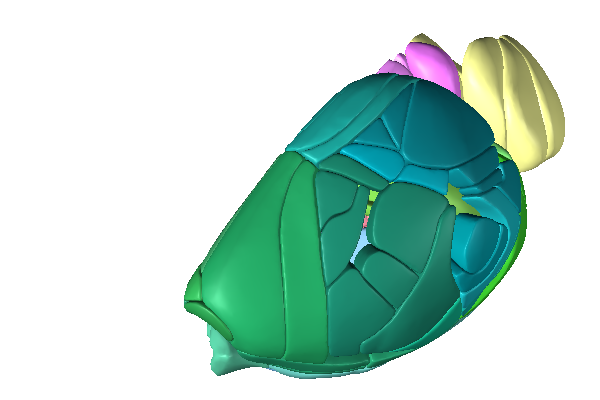

In [55]:
await urchin.camera.main.screenshot(size=[600,400])

In [72]:
# With all the areas loaded, let's color them using one of the available colormaps
urchin.ccf25.set_colormap('grey-green')
# We'll set the value of each area according to it's stimulus decoding effect, re-scaled to take advantage of the full colormap range
stim_decoding = datasets[0].decoding_effect.values
min_val = np.min(stim_decoding)
max_val = np.max(stim_decoding)
def rescale(val):
    return (val - min_val) / (max_val - min_val)

stim_decoding_rescaled = [rescale(x) for x in stim_decoding]

urchin.ccf25.set_color_intensity(area_list, stim_decoding_rescaled, 'left')

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


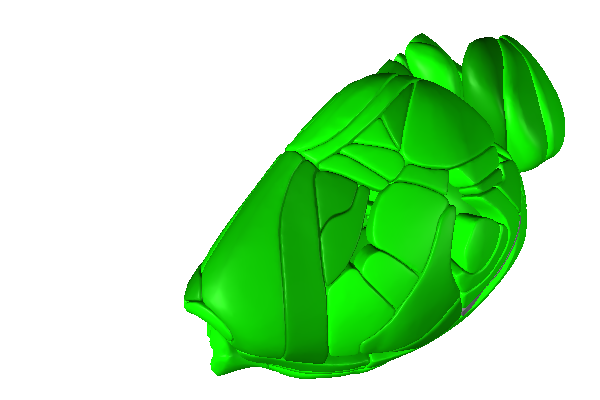

In [60]:
await urchin.camera.main.screenshot(size=[600,400])

We could make that look a little nicer by loading _all_ the areas, since a few aren't included in the decoding analysis, and coloring the ones that are missing grey. But let's stop there for now.

In [13]:
urchin.ccf25.clear()

Each Atlas includes a set of "default" areas. These are the highest regions in the ontology hierarchy that split the brain into major areas. Loading the defaults can be useful to create a clean visualization of the whole brain where major areas are clearly segmented.

Loading the defaults loads the left and right hemispheres separately, this is so that you can easily use the "explode" feature to pull brain regions apart. This does mean that if you want to set the materials, colors, etc, you need to use `sided='left'` or `sided='right'` 

In [2]:
urchin.ccf25.load_defaults()

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


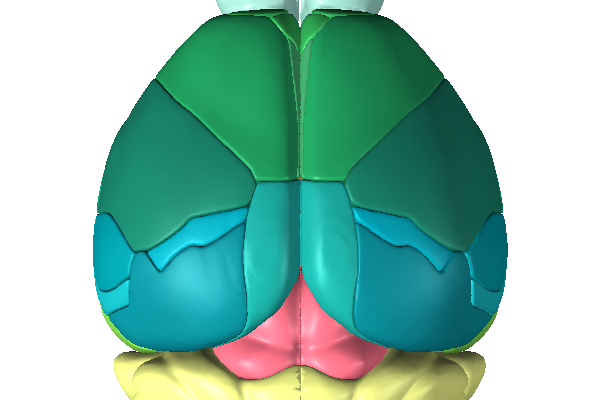

In [15]:
await urchin.camera.main.screenshot(size=[600,400])